#FinMark Corporation

**About the Company:**

FinMark Corporation specializes in providing a wide range of services aimed at empowering businesses with the insights and strategies necessary to succeed in today's competitive market. Its core offerings include financial analysis, marketing analytics, and business intelligence. The company is dedicated to supporting small and medium enterprises (SMEs) across Southeast Asia, helping them optimize marketing strategies and improve financial planning through advanced data analytics.

**Problem Statement:** FinMark Corporation offers financial products like savings accounts, credit cards, and loans, but all customers receive the same options, which may not fit their individual needs. FinMark wants to improve by offering personalized products to different customer groups based on their behavior and preferences.

**Project Deliverables:** As their data analyst, the task is to create a data model using clustering techniques to group customers into segments. These segments will help recommend personalized financial products, improving customer satisfaction and relevance

##**Customer Feedback Data**

**1. Import relevant libraries**

In [ ]:
import pandas as pd
import numpy as np

**2. Load the dataset**

In [ ]:
cust= pd.read_csv('Customer_Feedback_Data.csv')
prod= pd.read_csv('Product_Offering_Data.csv')
trans= pd.read_csv('Transaction_Data.csv')

In [ ]:
cust.head()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7


**3. Dropping duplicates of Customer ID and keeping the last row**

In [ ]:
cust.drop_duplicates(subset=['Customer_ID'],inplace= True, keep= 'last')
cust.sort_values(by='Customer_ID', inplace= True)
cust.reset_index(drop= True, inplace= True)
cust.head()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,7.0,Good service,9
1,2,3.0,Very satisfied,7
2,3,6.0,Unsatisfactory,2
3,4,6.0,Unsatisfactory,2
4,5,8.0,Excellent,1


In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              1000 non-null   int64  
 1   Satisfaction_Score       984 non-null    float64
 2   Feedback_Comments        1000 non-null   object 
 3   Likelihood_to_Recommend  1000 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


**4. Mapping Feedback comments to each satisfaction score**

In [ ]:
feedback_map={'Very satisfied':8, 'Excellent':10, 'Good service':6, 'Needs improvement':4, 'Unsatisfactory':2}

In [ ]:
cust['Satisfaction_Score'] = cust['Feedback_Comments'].map(feedback_map)
cust.head()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,6,Good service,9
1,2,8,Very satisfied,7
2,3,2,Unsatisfactory,2
3,4,2,Unsatisfactory,2
4,5,10,Excellent,1


**5. Dropping categorical columns**

In [ ]:
cust= cust.drop(['Feedback_Comments'], axis=1)
cust.head()

,Customer_ID,Satisfaction_Score,Likelihood_to_Recommend
0,1,6,9
1,2,8,7
2,3,2,2
3,4,2,2
4,5,10,1


##**Product Offering Data**

In [ ]:
prod.head()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,NaN,Medium
1,2,Gold Savings Account,Savings Account,Low,NaN,Low
2,3,High-Yield Investment Account,Investment,High,NaN,High
3,4,Mortgage Loan,Loan,Medium,NaN,High
4,5,Auto Loan,Loan,Medium,NaN,Medium


In [ ]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           15 non-null     int64  
 1   Product_Name         15 non-null     object 
 2   Product_Type         15 non-null     object 
 3   Risk_Level           15 non-null     object 
 4   Target_Age_Group     0 non-null      float64
 5   Target_Income_Group  15 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 852.0+ bytes


**1. Dropping Target_Age_Group column and mapping Risk_Level and Target_Income_Group**

In [ ]:
prod= prod.drop(['Target_Age_Group'], axis=1)
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
prod['Risk_Level']= prod['Risk_Level'].map(mapping)
prod['Target_Income_Group']= prod['Target_Income_Group'].map(mapping)

In [ ]:
prod.head()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,1,1
1,2,Gold Savings Account,Savings Account,0,0
2,3,High-Yield Investment Account,Investment,2,2
3,4,Mortgage Loan,Loan,1,2
4,5,Auto Loan,Loan,1,1


##**Transaction Data**

In [ ]:
trans.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment


In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      5050 non-null   int64  
 1   Customer_ID         5050 non-null   int64  
 2   Transaction_Date    5050 non-null   object 
 3   Transaction_Amount  4950 non-null   float64
 4   Transaction_Type    5050 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 197.4+ KB


**1. Performing EDA with the transactions dataset**

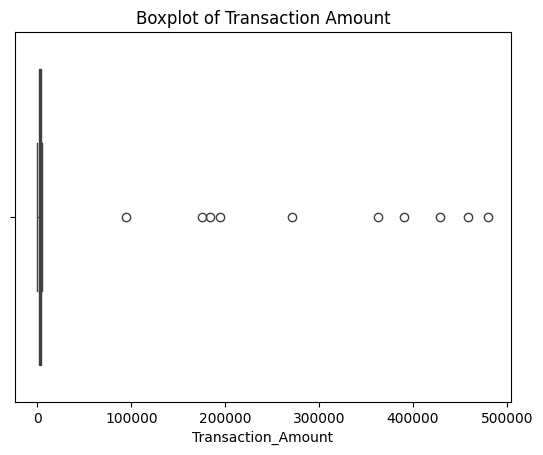

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Boxplot of Transaction Amount')
sns.boxplot(x= trans['Transaction_Amount'])
plt.show()

Figure above shows multiple outliers

**2. Capping the outliers to the 95th percentile**

In [ ]:
percentile95= trans['Transaction_Amount'].quantile(0.95)
percentile75= trans['Transaction_Amount'].quantile(0.75)
percentile25= trans['Transaction_Amount'].quantile(0.25)

iqr= percentile75-percentile25
upper_bound= percentile95+1.5*iqr

trans['Transaction_Amount']= [percentile95 if x>upper_bound else x for x in trans['Transaction_Amount']]

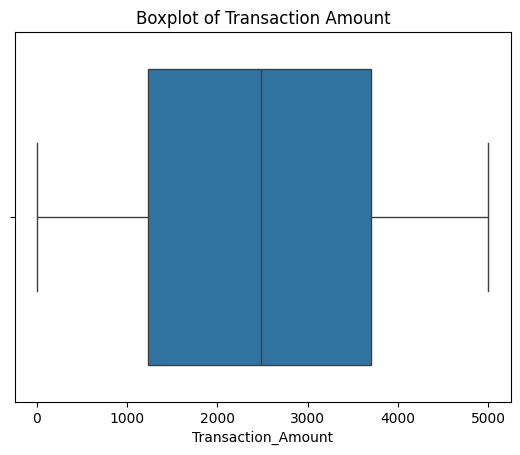

In [ ]:
plt.title('Boxplot of Transaction Amount')
sns.boxplot(x=trans['Transaction_Amount'])
plt.show()

**3. Filling the missing values with the median**

In [ ]:
trans['Transaction_Amount']= trans['Transaction_Amount'].fillna(trans['Transaction_Amount'].median())
trans['Transaction_Amount']= trans['Transaction_Amount'].astype(int)

In [ ]:
trans.describe()

,Transaction_ID,Customer_ID,Transaction_Amount
count,5050.000000,5050.000000,5050.000000
mean,2498.927129,504.692871,2490.137822
std,1443.059092,291.593793,1425.459873
min,1.000000,1.000000,10.000000
25%,1250.250000,251.250000,1257.000000
50%,2500.500000,509.000000,2483.000000
75%,3745.750000,764.000000,3680.750000
max,5000.000000,1000.000000,4999.000000


**4. Feature extraction with the Transaction Date**

In [ ]:
trans['Transaction_Date']= pd.to_datetime(trans['Transaction_Date'])
trans['Month']= trans['Transaction_Date'].dt.month
trans['Day']= trans['Transaction_Date'].dt.day
trans= trans.sort_values(by='Transaction_Date')
trans.set_index('Transaction_Date', inplace= True)

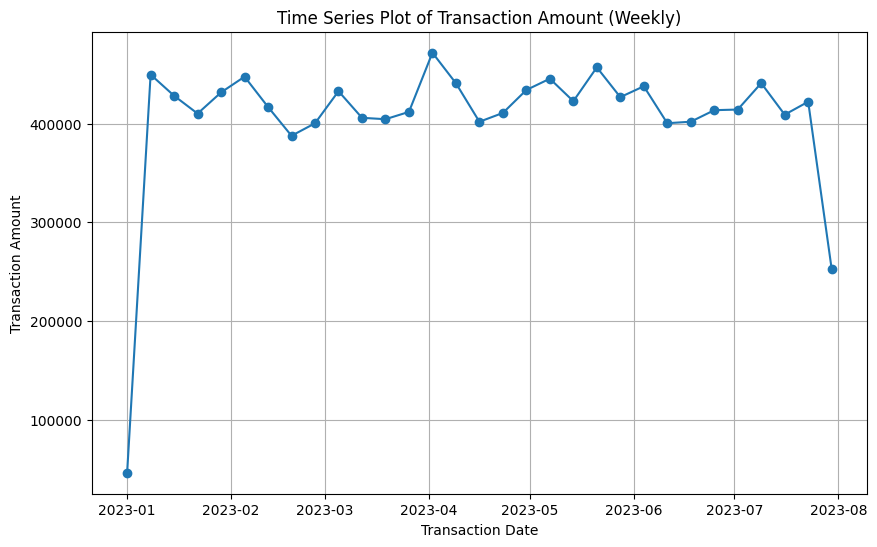

In [ ]:
df_monthly = trans.resample('W').sum()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Transaction_Amount'], marker= 'o', linestyle='-')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.title('Time Series Plot of Transaction Amount (Weekly)')
plt.grid(True)
plt.show()

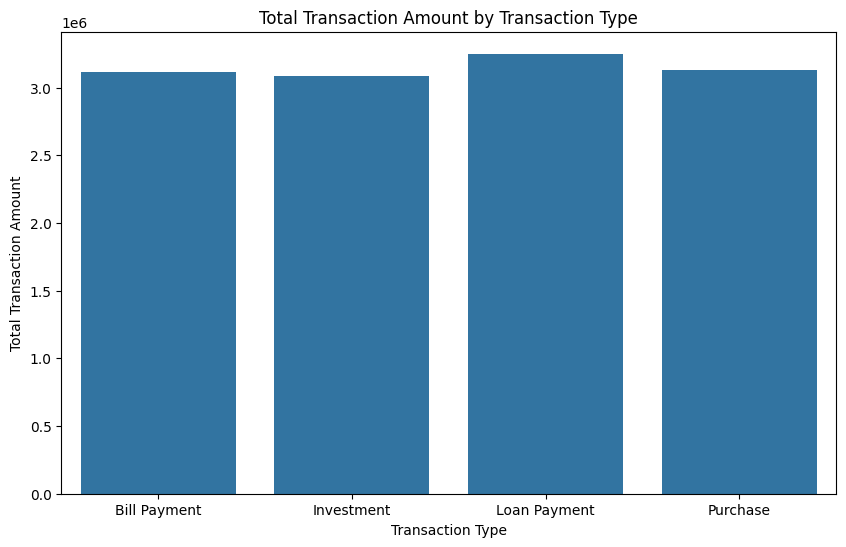

In [ ]:
transaction_amount_by_type = trans.groupby('Transaction_Type')['Transaction_Amount'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_amount_by_type.index, y=transaction_amount_by_type.values)
plt.xlabel('Transaction Type')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount by Transaction Type')
plt.show()

**5. Merging Transaction dataset with the customer feedback dataset**

In [ ]:
trans= pd.merge(trans, cust, on='Customer_ID', how='inner')
trans.head(10)

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Type,Month,Day,Satisfaction_Score,Likelihood_to_Recommend
0,1,393,3472,Purchase,1,1,10,3
1,2,826,2483,Bill Payment,1,1,4,3
2,3,916,10,Purchase,1,1,4,5
3,4,109,72,Investment,1,1,6,7
4,5,889,1793,Investment,1,1,6,8
5,6,348,3824,Loan Payment,1,1,4,10
6,7,50,235,Loan Payment,1,1,6,4
7,8,916,1052,Loan Payment,1,1,4,5
8,9,105,854,Purchase,1,1,8,6
9,10,420,2690,Investment,1,1,6,9


**6. Scaling Numerical Features and Label Encoding Categorical Features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
scaler= MinMaxScaler()
trans['Transaction_Amount']= scaler.fit_transform(trans[['Transaction_Amount']])
trans['Month']= scaler.fit_transform(trans[['Month']])
trans['Day']= scaler.fit_transform(trans[['Day']])

In [ ]:
trans= trans.drop(['Transaction_ID', 'Customer_ID'], axis=1)
trans = trans.reset_index(drop= True)
encoder= LabelEncoder()
trans['Transaction_Type']= encoder.fit_transform(trans['Transaction_Type'])

In [ ]:
trans.head()

,Transaction_Amount,Transaction_Type,Month,Day,Satisfaction_Score,Likelihood_to_Recommend
0,0.693927,3,0.0,0.0,10,3
1,0.495691,0,0.0,0.0,4,3
2,0.000000,3,0.0,0.0,4,5
3,0.012427,1,0.0,0.0,6,7
4,0.357386,1,0.0,0.0,6,8


##**KMeans Clustering**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**1. Find the best number of cluster (K)**

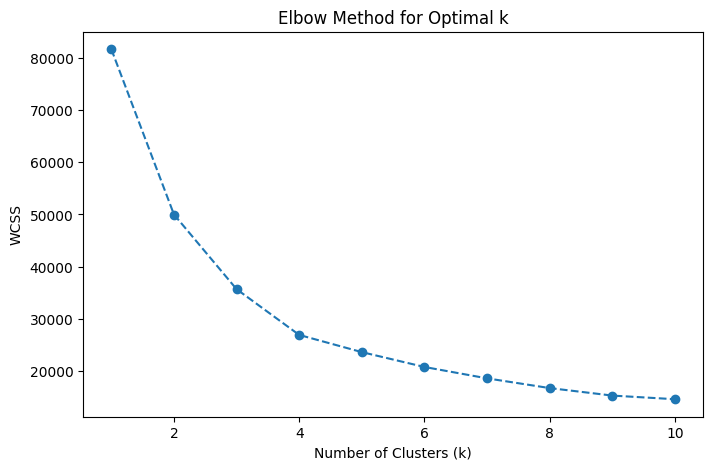

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(trans)  # Use your standardized dataset
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

**2. Using 4 as the k value, apply KMeans clustering**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(trans)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(trans)

trans_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
trans_pca["Cluster"] = clusters


**3. Visualizing the cluster**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


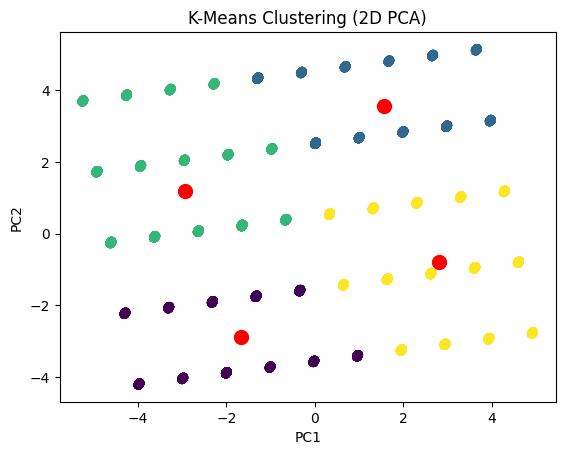

In [ ]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.scatter(trans_pca["PC1"], trans_pca["PC2"], c=trans_pca["Cluster"], cmap="viridis")
plt.plot(centroids_pca[:, 0], centroids_pca[:, 1], 'o', markersize=10, color='red')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering (2D PCA)")
plt.show()

4. Labeling the cluster

In [ ]:
trans['cluster']= kmeans.labels_

In [ ]:
cluster_summary = trans.groupby('cluster').mean()
print(cluster_summary)

         Transaction_Amount  Transaction_Type     Month       Day  \
cluster                                                             
0                  0.509165          1.447415  0.508021  0.465181   
1                  0.509783          1.565594  0.482673  0.501609   
2                  0.494591          1.491203  0.496951  0.479991   
3                  0.485262          1.520306  0.487836  0.480616   

         Satisfaction_Score  Likelihood_to_Recommend  
cluster                                               
0                  2.926916                 3.486631  
1                  8.792079                 7.698020  
2                  7.147080                 2.870514  
3                  4.297822                 8.237198  


**Insights:**

1. Cluster 1 has the highest Satisfaction Score (8.79) and a high Likelihood to Recommend (7.69).
2. Cluster 3 also has a high Likelihood to Recommend (8.23) but a lower Satisfaction Score (4.29).
3. Cluster 2 has moderate Satisfaction (7.14) but a very low Likelihood to Recommend (2.87).
4. Cluster 0 has the lowest Satisfaction Score (2.92) and a moderate Likelihood to Recommend (3.48).

**Recommendation:**
1. If FinMark wants to target customers with high Satisfaction & Likelihood to Recommend, Cluster 1 & 3 are key groups.
2. Cluster 2 is interesting—customers are satisfied but don’t recommend the service. This might mean they are not engaged or see little added value.
3. Cluster 0 likely represents dissatisfied customers who need intervention.